In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
%matplotlib inline
import quantecon as qe
import scipy.optimize as optimize
import scipy.sparse as sparse
from quantecon import compute_fixed_point
from quantecon.markov import DiscreteDP
import copy
import csv
from Leapfrogging import leapfrogging
lf = leapfrogging()
from RLS import rls_class
import torch
rls = rls_class()

In [2]:
ss1 = lf.cSS(lf.nC)
ESS1 = lf.cESS(lf.nC)
Gtau= lambda ss, ESS, tau: lf.state_recursion(ss,ESS, tau)  
ESS, TAU, out=rls.solve(Gtau,ss1.copy(),ESS1.copy(),lf.stage_index)


ESR[0]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[0]['bases']:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ESR[1000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  1 -1  1  1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[1000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
ESR[2000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1  0  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1]
ESR[2000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
ESR[3000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1]
ESR[3000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0]
ESR[4000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  0  1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1 -1]
ESR[4000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0]
ESR[5000]['esr']  :
[-1 -1 -1 -

In [5]:
# save results to csv

to_csv = out

keys = to_csv[0].keys()

with open('output_1.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(to_csv)

In [12]:
# open the results
output1 = []
with open('output_1.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        output1.append(row)

In [7]:
number_of_equilibria1=np.size(out)
T1=torch.numel(torch.tensor(lf.stage_index))

y1 = np.zeros(T1)
for i in range(T1):
    y1[i] = sum(TAU==i)
V1 = np.zeros((number_of_equilibria1,2))
MPEesr1 = np.empty(number_of_equilibria1,dtype='object')
for iEQ in range(number_of_equilibria1):
    V1[iEQ,0]=out[iEQ]['V1']
    V1[iEQ,1]=out[iEQ]['V2']
    MPEesr1[iEQ]=out[iEQ]['MPEesr']
print(f'number of equilibria game (1): {number_of_equilibria1}')

number of equilibria game (1): 46707


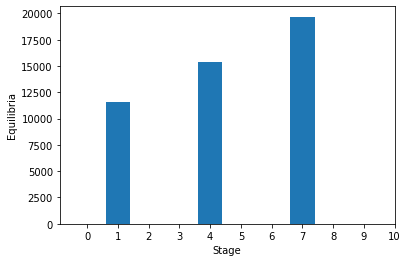

In [8]:
plt.bar(range(T1),y1)
fig1 = plt.gca()
fig1.set_ylabel('Equilibria')
fig1.set_xlabel('Stage')
fig1.set_xticks(np.arange(0, 11, 1))
plt.show()

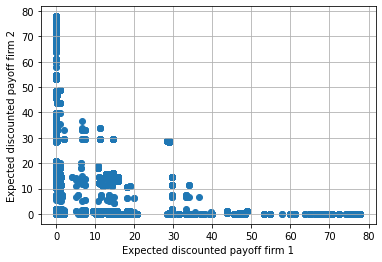

In [10]:
plt.scatter(V1[:,0],V1[:,1])
fig2 = plt.gca()
fig2.set_ylabel('Expected discounted payoff firm 2')
fig2.set_xlabel('Expected discounted payoff firm 1')
fig2.grid(True)
plt.show()

In [11]:
# game 2:
lf2 = leapfrogging(r1 = lambda x1,x2: np.maximum(x2-x1+x1/10,x1/10))
ss1 = lf2.cSS(lf.nC)
ESS1 = lf2.cESS(lf.nC)
Gtau= lambda ss, ESS, tau: lf2.state_recursion(ss,ESS, tau)  
ESS2, TAU2, out2=rls.solve(Gtau,ss1.copy(),ESS1.copy(),lf2.stage_index)

ESR[0]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[0]['bases']:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ESR[1000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1  0  1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[1000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ESR[2000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  0 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[2000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ESR[3000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0 -1  0  1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[3000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ESR[4000]['esr']  :
[-1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
ESR[4000]['bases']:
[0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ESR[5000]['esr']  :
[-1 -1 -1 -

In [12]:
# save results to csv

to_csv = out2

keys = to_csv[0].keys()

with open('output_2.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(to_csv)

In [21]:
# find total number of equilibria:
number_of_equilibria2=np.size(out2)
T2=torch.numel(torch.tensor(lf.stage_index))

# save the expected discounted payoffs and esr in MPE
y2 = np.zeros(T2)
for i in range(T2):
    y2[i] = sum(TAU2==i)
V2 = np.zeros((number_of_equilibria1,2))
MPEesr2 = np.empty(number_of_equilibria1,dtype='object')
for iEQ in range(number_of_equilibria1):
    V2[iEQ,0]=out[iEQ]['V1']
    V2[iEQ,1]=out[iEQ]['V2']
    MPEesr2[iEQ]=out[iEQ]['MPEesr']
print(f'number of equilibria game (2): {number_of_equilibria2}')

number of equilibria game (2): 28903


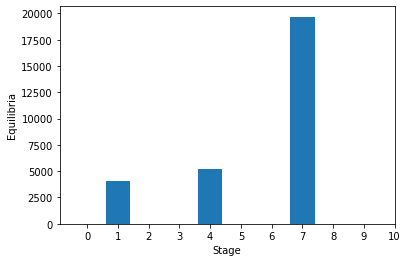

In [22]:
# plot the total number of equilibria
plt.bar(range(T2),y2)
fig1 = plt.gca()
fig1.set_ylabel('Equilibria')
fig1.set_xlabel('Stage')
fig1.set_xticks(np.arange(0, 11, 1))
plt.show()

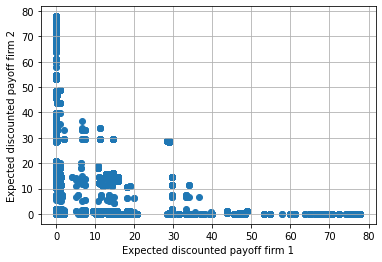

In [23]:
# plot all the discounted payoffs
plt.scatter(V2[:,0],V2[:,1])
fig2 = plt.gca()
fig2.set_ylabel('Expected discounted payoff firm 2')
fig2.set_xlabel('Expected discounted payoff firm 1')
fig2.grid(True)
plt.show()